# Example of working with Athena project files

In [1]:
# load an Athena project file from the examples

import os
from larch.io.athena_project import read_athena

aprjfile = os.path.join("..", "pca", "cyanobacteria.prj")
aprj = read_athena(aprjfile)

In [3]:
# show the Groups contained in the `groups` dictionary
aprj

Group,Sel
ozun,✔
d_2_42,✔
d_4_73,✔
d_7_03,✔
d_9_33,✔
d_20,✔
rjbc,✔
d_720,✔
hqlr,✔
Au1_Cl,✔


In [4]:
# the dictionary containing the loaded Groups can be accessed directly
aprj.groups

OrderedDict([('ozun', <Group 0x7fbfb472ed90>),
             ('d_2_42', <Group 0x7fbfb46b5150>),
             ('d_4_73', <Group 0x7fbfb46b5490>),
             ('d_7_03', <Group 0x7fbfb46b5750>),
             ('d_9_33', <Group 0x7fbfb46b5990>),
             ('d_20', <Group 0x7fbfb46b5c10>),
             ('rjbc', <Group 0x7fbfb46b5e50>),
             ('d_720', <Group 0x7fbfb46b40d0>),
             ('hqlr', <Group 0x7fbfb46b4310>),
             ('Au1_Cl', <Group 0x7fbfb46b4510>),
             ('Au3_Cl_aq', <Group 0x7fbfb46b4750>),
             ('ixde', <Group 0x7fbfb46b4990>),
             ('Au_cyanide', <Group 0x7fbfb46b4bd0>),
             ('nyux', <Group 0x7fbfb46b4e10>),
             ('Au_sulphide', <Group 0x7fbfb46bb090>),
             ('Au_thiosulphate_aq', <Group 0x7fbfb46bb2d0>),
             ('ryzf', <Group 0x7fbfb46bb4d0>)])

In [5]:
# the selection of a group can be controlled with the "sel" attribute
aprj.d_2_42.sel = 0
aprj.d_4_73.sel = 0
aprj.d_7_03.sel = 0
aprj.groups['d_9_33'].sel = 0 # accessible also as dictionary
aprj.groups['ryzf'].sel = 0
aprj

Group,Sel
ozun,✔
d_2_42,
d_4_73,
d_7_03,
d_9_33,
d_20,✔
rjbc,✔
d_720,✔
hqlr,✔
Au1_Cl,✔


In [6]:
# show content of a single group
aprj.groups['ozun']

Attribute,Type
athena_id,str
energy,ndarray
mu,ndarray
bkg_params,Group
fft_params,Group
athena_params,Group
i0,ndarray
sel,int


In [7]:
# groups labels and selection can be edited also via UI (requires ipywidgets)
aprj.edit_groups()

Groups updated


In [8]:
# to check the UI have updated the groups
aprj

Group,Sel
ozun,✔
d_2_42,
d_4_73,
d_7_03,
d_9_33,
d_20,
rjbc,
d_720_newlabel,✔
hqlr,
Au1_Cl,✔


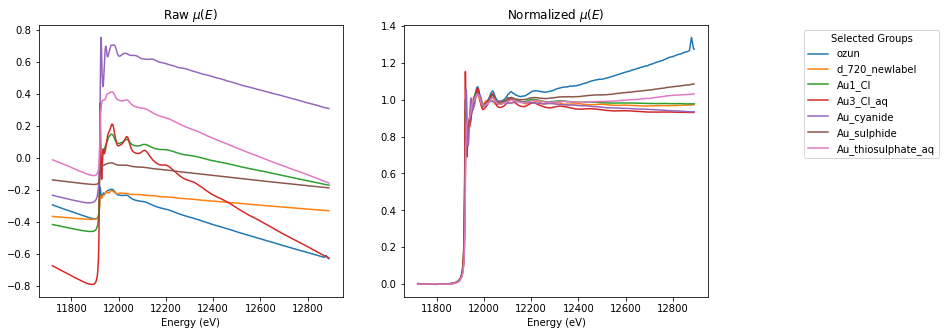

In [10]:
# example of how to iterate over selected Groups: normalize and plot

import matplotlib.pyplot as plt
from larch.xafs import pre_edge

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))
for name, grp in aprj.groups.items():
    if grp.sel == 0:
        # skip not selected Groups
        continue
    pre_edge(grp.energy, grp.mu, group=grp)
    ax = axs[0]
    ax.plot(grp.energy, grp.mu, label=name)
    ax.set_title(r"Raw $\mu(E)$")
    ax.set_xlabel("Energy (eV)")
    ax = axs[1]
    ax.plot(grp.energy, grp.norm, label=name)
    ax.set_title("Normalized $\mu(E)$")
    ax.set_xlabel("Energy (eV)")
    ax.legend(title="Selected Groups", bbox_to_anchor=(1.3, 1))